In [1]:
### import libs
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isnull().sum() ### No missing values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
#####

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

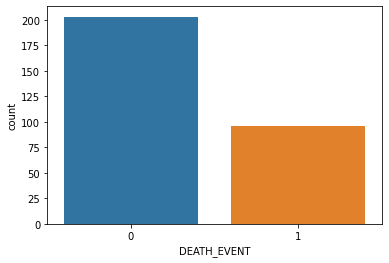

In [5]:
sns.countplot(df['DEATH_EVENT']) ### Fairly balanced

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
cols = [col for col in df.columns]

age


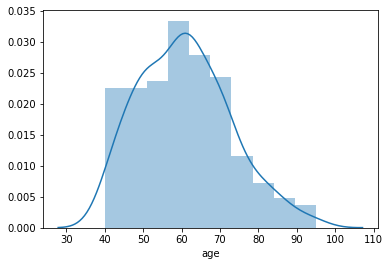

anaemia


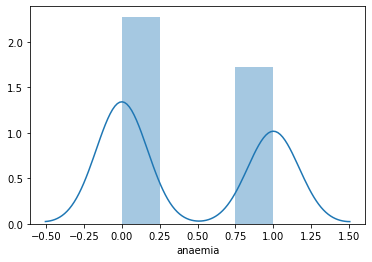

creatinine_phosphokinase


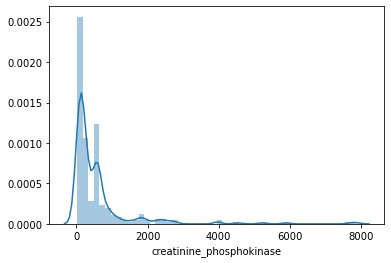

diabetes


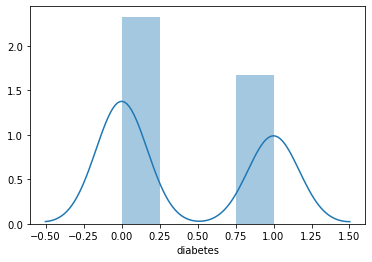

ejection_fraction


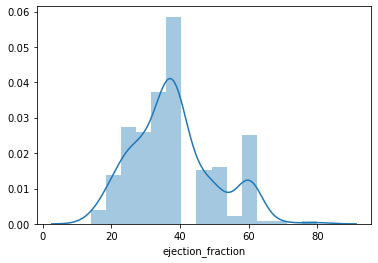

high_blood_pressure


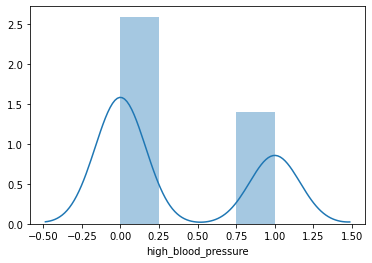

platelets


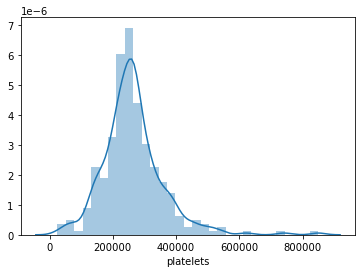

serum_creatinine


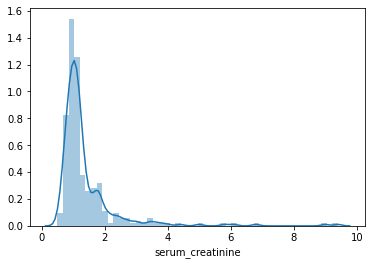

serum_sodium


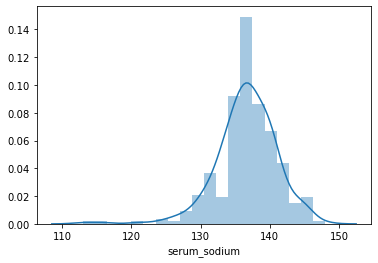

sex


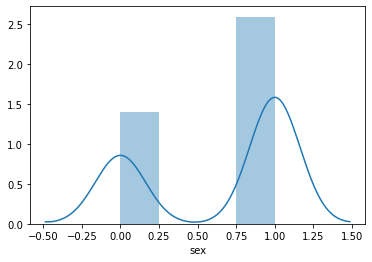

smoking


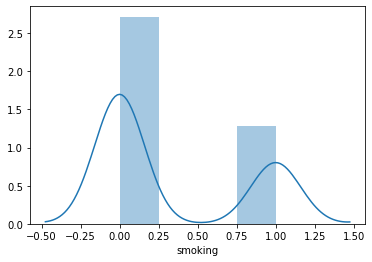

time


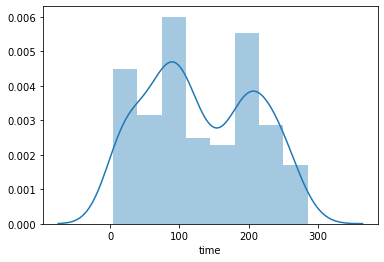

DEATH_EVENT


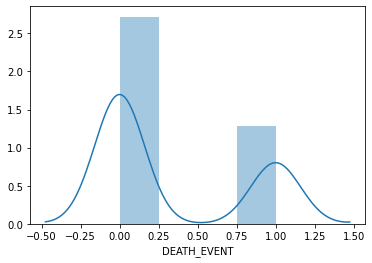

In [8]:
for col in cols:
    print(col)
    sns.distplot(df[col])
    plt.show()

age


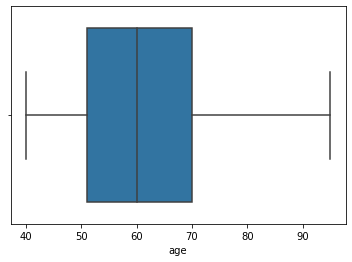

anaemia


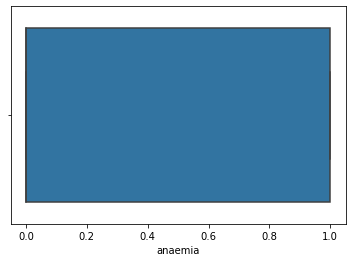

creatinine_phosphokinase


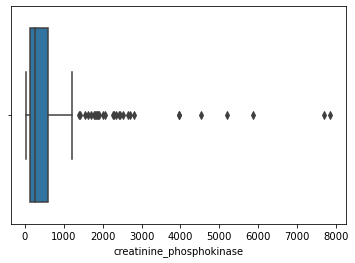

diabetes


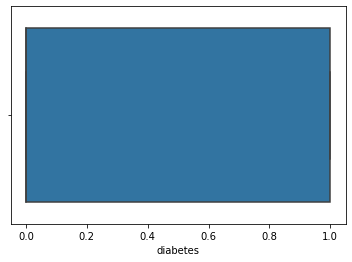

ejection_fraction


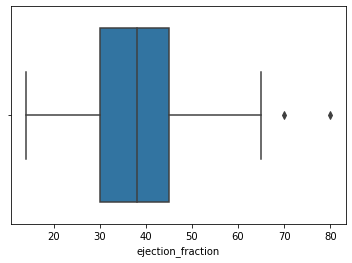

high_blood_pressure


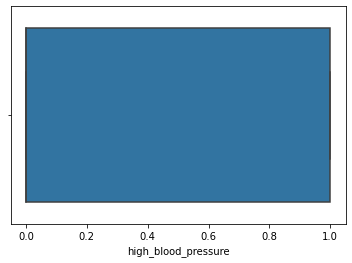

platelets


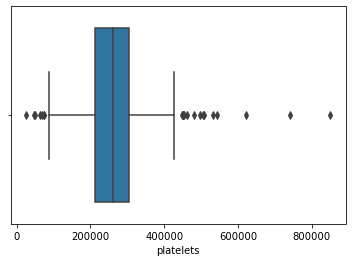

serum_creatinine


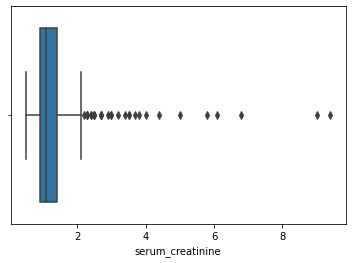

serum_sodium


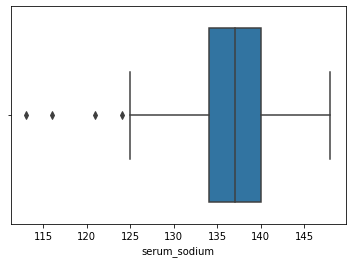

sex


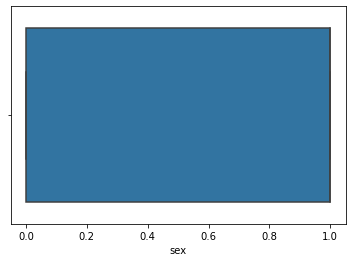

smoking


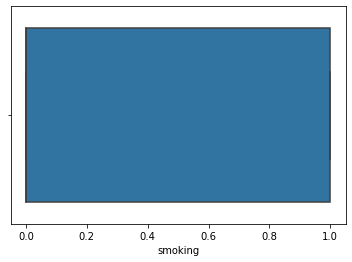

time


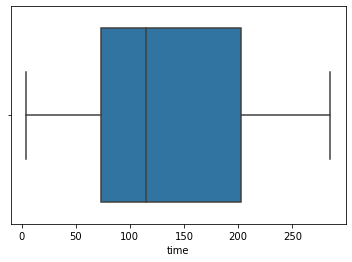

DEATH_EVENT


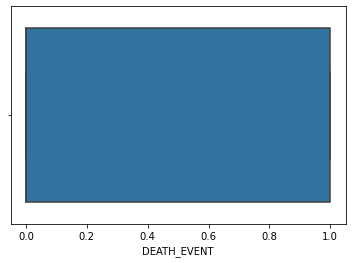

In [9]:
for col in cols:
    print(col)
    sns.boxplot(df[col])
    plt.show()

In [10]:
####creatinine_phosphokinase ### ejection_fraction ###platelets ###serum_creatinine ##serum_sodium

In [11]:
outlier_colums = ["creatinine_phosphokinase" ,"ejection_fraction","platelets","serum_creatinine" ,"serum_sodium"]

In [12]:
def clean_outlier(col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.50)
    lower_bound = df[col].quantile(0.25)- 1.5*IQR
    upper_bound = df[col].quantile(0.75) - 1.5*IQR
    df[col] = np.where(df[col] < lower_bound ,lower_bound,df[col])
    df[col] = np.where(df[col] > upper_bound ,upper_bound,df[col])

In [13]:
for col in outlier_colums:
    clean_outlier(col)

age


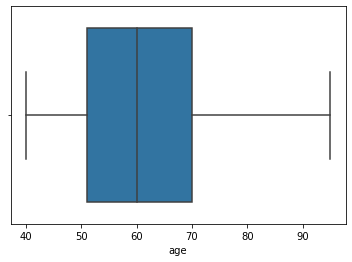

anaemia


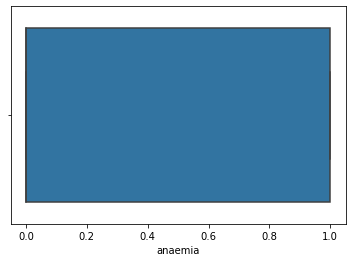

creatinine_phosphokinase


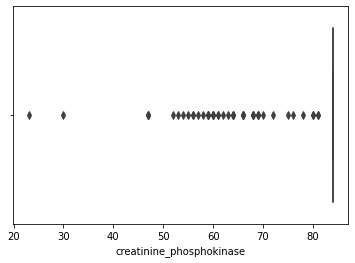

diabetes


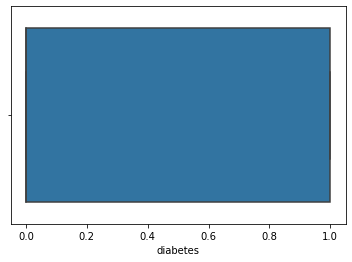

ejection_fraction


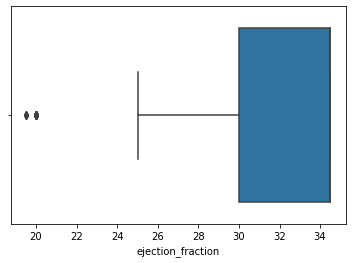

high_blood_pressure


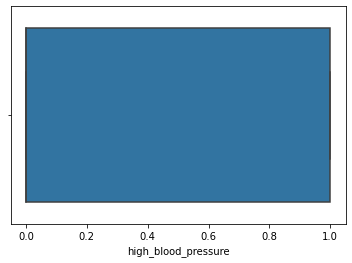

platelets


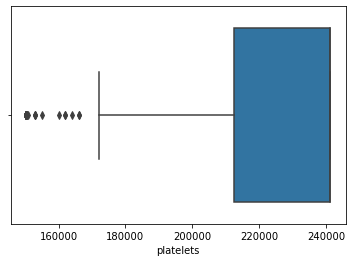

serum_creatinine


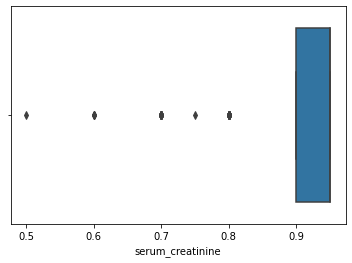

serum_sodium


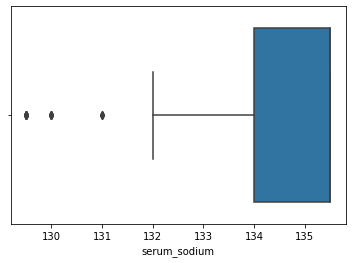

sex


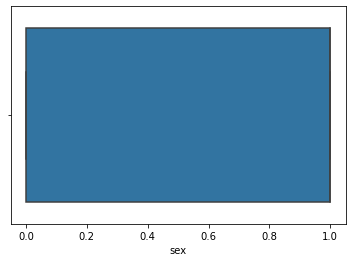

smoking


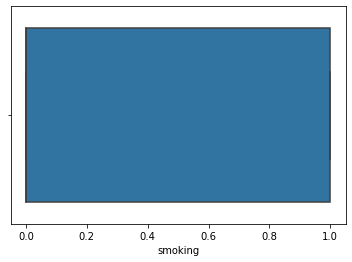

time


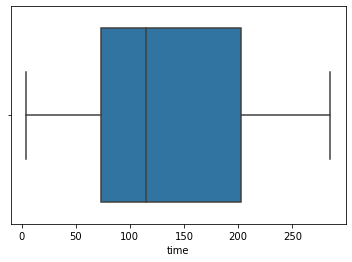

DEATH_EVENT


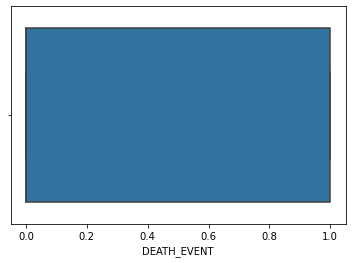

In [14]:
for col in cols:
    print(col)
    sns.boxplot(df[col])
    plt.show()

In [15]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,84.0,0,20.0,1,241250.0,0.95,130.0,1,0,4,1
1,55.0,0,84.0,0,34.5,0,241250.0,0.95,135.5,1,0,6,1
2,65.0,0,84.0,0,20.0,0,162000.0,0.95,129.5,1,1,7,1
3,50.0,1,84.0,0,20.0,0,210000.0,0.95,135.5,1,0,7,1
4,65.0,1,84.0,1,20.0,0,241250.0,0.95,129.5,0,0,8,1


In [16]:
y = df["DEATH_EVENT"].values
X = df.drop("DEATH_EVENT",axis=1).values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [22]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [23]:
X_train.shape,y_train.shape

(torch.Size([200, 12]), torch.Size([200]))

In [65]:
class Model(nn.Module):
    
    def __init__(self, in_feat = 12, h1=10,h2=6,out=2,p=0.2):
        super().__init__()
        self.fc1 = nn.Linear(in_feat,h1)
        self.drop = nn.Dropout(p)
        self.fc2 = nn.Linear(h1,h2)
        self.droptwo = nn.Dropout(p)
        self.fc3 = nn.Linear(h2,out)
        
    def forward(self,x):
        
        x = F.leaky_relu(self.fc1(x))
        x= self.drop(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.droptwo(x)
        x = F.sigmoid(self.fc3(x))
        
        return x

In [66]:
torch.manual_seed(42)
model = Model()

In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [68]:
epochs = 4200
losses = []

for i in range(epochs):
    
    i = i+1
    
    y_pred=model.forward(X_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss)
    
    if i%10==0:
        print(f"Epoch {i} and loss is {loss}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 10 and loss is 0.7013561129570007
Epoch 20 and loss is 0.6949176788330078
Epoch 30 and loss is 0.6902898550033569
Epoch 40 and loss is 0.6811276078224182
Epoch 50 and loss is 0.6724624037742615
Epoch 60 and loss is 0.6637643575668335
Epoch 70 and loss is 0.6520734429359436
Epoch 80 and loss is 0.6409825086593628
Epoch 90 and loss is 0.6338164806365967
Epoch 100 and loss is 0.6250879764556885
Epoch 110 and loss is 0.6173587441444397
Epoch 120 and loss is 0.6143254041671753
Epoch 130 and loss is 0.5975707769393921
Epoch 140 and loss is 0.5917559266090393
Epoch 150 and loss is 0.5927947759628296
Epoch 160 and loss is 0.5955500602722168
Epoch 170 and loss is 0.5865736603736877
Epoch 180 and loss is 0.5835423469543457
Epoch 190 and loss is 0.5914871692657471
Epoch 200 and loss is 0.5825187563896179
Epoch 210 and loss is 0.5884273648262024
Epoch 220 and loss is 0.5835561156272888
Epoch 230 and loss is 0.5943874716758728
Epoch 240 and loss is 0.5746512413024902
Epoch 250 and loss is 0.5

Epoch 2120 and loss is 0.407807320356369
Epoch 2130 and loss is 0.4107814431190491
Epoch 2140 and loss is 0.40743014216423035
Epoch 2150 and loss is 0.40240246057510376
Epoch 2160 and loss is 0.40344229340553284
Epoch 2170 and loss is 0.40725478529930115
Epoch 2180 and loss is 0.39834272861480713
Epoch 2190 and loss is 0.38908493518829346
Epoch 2200 and loss is 0.4195837080478668
Epoch 2210 and loss is 0.4176079034805298
Epoch 2220 and loss is 0.42318519949913025
Epoch 2230 and loss is 0.4075208604335785
Epoch 2240 and loss is 0.4083865284919739
Epoch 2250 and loss is 0.40739181637763977
Epoch 2260 and loss is 0.39404192566871643
Epoch 2270 and loss is 0.40854212641716003
Epoch 2280 and loss is 0.40181946754455566
Epoch 2290 and loss is 0.4078931510448456
Epoch 2300 and loss is 0.39451682567596436
Epoch 2310 and loss is 0.4073318839073181
Epoch 2320 and loss is 0.3984362483024597
Epoch 2330 and loss is 0.4083191156387329
Epoch 2340 and loss is 0.3912777006626129
Epoch 2350 and loss is 

Epoch 4170 and loss is 0.3956611752510071
Epoch 4180 and loss is 0.3856221139431
Epoch 4190 and loss is 0.39173462986946106
Epoch 4200 and loss is 0.38956329226493835


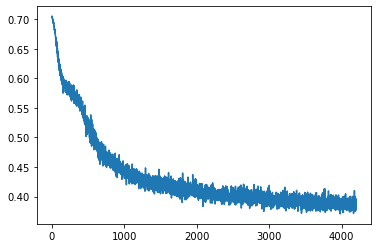

In [69]:
plt.plot(range(epochs),losses)

In [70]:
with torch.no_grad():
    y_val =model.forward(X_test)
    loss = criterion(y_val,y_test)

In [71]:
loss

tensor(0.5273)

In [72]:
X_train.dtype


torch.float32

In [77]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([1.0000e+00, 1.2653e-13])        0
 2. tensor([1.0000e+00, 1.1326e-25])        0
 3. tensor([9.9998e-01, 3.0325e-05])        1
 4. tensor([0.0051, 0.9948])                1
 5. tensor([1.0000e+00, 4.8390e-07])        0
 6. tensor([1.0000e+00, 1.1137e-20])        0
 7. tensor([0.3657, 0.6857])                1
 8. tensor([0.1292, 0.8855])                0
 9. tensor([5.9574e-07, 1.0000e+00])        1
10. tensor([9.9999e-01, 7.4257e-06])        0
11. tensor([1.0000e+00, 3.6019e-11])        0
12. tensor([9.9991e-01, 4.8403e-05])        1
13. tensor([9.9999e-01, 2.0449e-06])        1
14. tensor([1.0000e+00, 2.0658e-17])        0
15. tensor([1.0000e+00, 2.4147e-11])        0
16. tensor([9.9998e-01, 9.4398e-06])        1
17. tensor([9.9971e-01, 1.4441e-04])        0
18. tensor([0.9963, 0.0027])                0
19. tensor([1.0000e+00, 1.7725e-07])        1
20. tensor([0.1090, 0.8999])                1
21. tensor([0.9946, 0.0064])                0
22. tensor([1.0000e+00, 1.4204e-15

In [76]:
y_pred

tensor(194)